In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Deep Learning

/content/drive/MyDrive/Deep Learning


In [ ]:
# import libraries

# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# text processing
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = set(stopwords.words('english'))


# sklearn
from sklearn.metrics import classification_report, confusion_matrix

# utils
import os
from tqdm import tqdm
tqdm.pandas()
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Import the necessary libraries
import pandas as pd

# Read processed data from a CSV file (assuming 'imdb_processed.csv' exists in the current directory)
data = pd.read_csv('./imdb_processed.csv')

# Iterate through the first two rows of the 'data' DataFrame
for row in data[:2].iterrows():
    # Print the 'processed' column value from the current row
    print(row[1]['processed'])

    # Print the 'label' column value from the current row
    print(f'Label: {row[1]["label"]}')

    # Print a newline character for separation
    print('\n')


One reviewer mentioned watching Oz episode hooked . They right , exactly happened . The first thing struck Oz brutality unflinching scene violence , set right word GO . Trust , show faint hearted timid . This show pull punch regard drug , sex violence . Its hardcore , classic use word . It called OZ nickname given Oswald Maximum Security State Penitentary . It focus mainly Emerald City , experimental section prison cell glass front face inwards , privacy high agenda . Em City home many . . Aryans , Muslims , gangsta , Latinos , Christians , Italians , Irish . . . . scuffle , death stare , dodgy dealing shady agreement never far away . I would say main appeal show due fact go show dare . Forget pretty picture painted mainstream audience , forget charm , forget romance . . . OZ mess around . The first episode I ever saw struck nasty surreal , I say I ready , I watched , I developed taste Oz , got accustomed high level graphic violence . Not violence , injustice crooked guard sold nickel 

In [ ]:
# Get all processed reviews from the 'data' DataFrame and store them in the 'reviews' variable
reviews = data.processed.values

# Merge all reviews into a single variable, separating them by whitespaces
words = ' '.join(reviews)

# Split the merged text into a list of words
words = words.split()

# Print the first 10 words in the list
words[:10]


['One',
 'reviewer',
 'mentioned',
 'watching',
 'Oz',
 'episode',
 'hooked',
 '.',
 'They',
 'right']

In [ ]:
# Import the 'Counter' class from the 'collections' module
from collections import Counter

# Count the frequency of each word in the 'words' list and store the counts in 'counter'
counter = Counter(words)

# Create a vocabulary by sorting words based on their frequencies in descending order
vocab = sorted(counter, key=counter.get, reverse=True)

# Create a dictionary 'int2word' that maps word IDs to words, starting from 1 (0 is reserved for padding)
int2word = dict(enumerate(vocab, 1))

# Add a special token for padding at ID 0 in 'int2word'
int2word[0] = '<PAD>'

# Create a dictionary 'word2int' that maps words to their corresponding IDs
word2int = {word: id for id, word in int2word.items()}


In [ ]:
# Encode words in the 'reviews' using the 'word2int' mapping
# This code converts each review into a list of word IDs
reviews_enc = [[word2int[word] for word in review.split()] for review in tqdm(reviews)]

# Print the first 10 words of the first 5 reviews after encoding
for i in range(5):
    print(reviews_enc[i][:5])


100%|██████████| 50000/50000 [00:02<00:00, 18745.44it/s]

[191, 1083, 930, 81, 3724]
[47, 328, 59, 244, 1]
[3, 95, 328, 30, 1041]
[2408, 136, 59, 241, 3230]
[70982, 10566, 1081, 1941, 7538]


In [ ]:
# Define a function 'pad_features' for padding sequences
def pad_features(reviews, pad_id, seq_length=128):
    # Create a NumPy array 'features' filled with pad_id values
    features = np.full((len(reviews), seq_length), pad_id, dtype=int)

    # Loop over each review and update 'features' with word IDs
    for i, row in enumerate(reviews):
        # If the review is longer than seq_length, it will be trimmed
        features[i, :len(row)] = np.array(row)[:seq_length]

    return features

# Set the desired sequence length
seq_length = 256

# Pad the encoded reviews using the 'pad_features' function
# 'pad_id' is set to the word ID corresponding to '<PAD>'
features = pad_features(reviews_enc, pad_id=word2int['<PAD>'], seq_length=seq_length)

# Assert that the number of features matches the number of encoded reviews
assert len(features) == len(reviews_enc)

# Assert that each feature has the specified sequence length
assert len(features[0]) == seq_length

# Print the first 10 rows and the first 10 columns of 'features' for inspection
features[:10, :10]


array([[  191,  1083,   930,    81,  3724,   186,  3030,     1,   118,
          114],
       [   47,   328,    59,   244,     1,     7,  1267,  1608, 17875,
            4],
       [    3,    95,   328,    30,  1041,    13,   845,  1774,  2633,
            2],
       [ 2408,   136,    59,   241,  3230,    37,   650,  4298,   583,
          882],
       [70982, 10566,  1081,  1941,  7538,  2280,  1313,     6,    46,
            1],
       [ 2795,     4,    13,   368,     5,     2,    17, 42503,     2,
         2952],
       [    3,   197,    18,    10,    21, 12517,  1904, 55922,   121,
         5112],
       [   14,    31,   427,     2,  1342,  4021,   165,    34,  2960,
            1],
       [47893,   980,   359,     6,     3,   180,   776,    81,     6,
            1],
       [   64,    10,   125,  2269,  5606,  1980,    10,     5,     1,
           64]])

In [ ]:
# get labels as numpy
labels = data.label.to_numpy()
labels

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
# Define the train size (percentage of data to use for training) and val size (percentage of test data for validation)
train_size = 0.7  # We will use 70% of the data for training
val_size = 0.5    # We will use 50% of the test data for validation

# Make the train set
# Calculate the split index for the train set based on 'train_size'
split_id = int(len(features) * train_size)
# Split 'features' and 'labels' into train and remaining sets
train_x, remain_x = features[:split_id], features[split_id:]
train_y, remain_y = labels[:split_id], labels[split_id:]

# Make the validation and test sets
# Calculate the split index for the validation set based on 'val_size'
split_val_id = int(len(remain_x) * val_size)
# Split 'remain_x' and 'remain_y' into validation and test sets
val_x, test_x = remain_x[:split_val_id], remain_x[split_val_id:]
val_y, test_y = remain_y[:split_val_id], remain_y[split_val_id:]

# Print out the shapes of the data sets
print('Feature Shapes:')
print('===============')
print('Train set: {}'.format(train_x.shape))
print('Validation set: {}'.format(val_x.shape))
print('Test set: {}'.format(test_x.shape))


Feature Shapes:
Train set: (35000, 256)
Validation set: (7500, 256)
Test set: (7500, 256)


In [ ]:
# Print the number of samples for each class in the training set
print(len(train_y[train_y == 0]), len(train_y[train_y == 1]))

# Print the number of samples for each class in the validation set
print(len(val_y[val_y == 0]), len(val_y[val_y == 1]))

# Print the number of samples for each class in the test set
print(len(test_y[test_y == 0]), len(test_y[test_y == 1]))


17510 17490
3753 3747
3737 3763


In [ ]:
# Define model hyperparameters
vocab_size = len(word2int)  # The size of the vocabulary (number of unique words)
output_size = 1  # The output size, typically 1 for binary classification
embedding_size = 256  # The size of word embedding vectors
hidden_size = 512  # The number of units in the RNN's hidden state
n_layers = 2  # The number of RNN layers
dropout = 0.25  # Dropout probability for regularization

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dropout, Dense

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=embedding_size))
model.add(SimpleRNN(hidden_size, return_sequences=True))
model.add(Dropout(dropout))
model.add(SimpleRNN(hidden_size, return_sequences=True))
model.add(Dropout(dropout))
model.add(SimpleRNN(hidden_size))
model.add(Dense(output_size, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 256)          31053056  
                                                                 
 simple_rnn (SimpleRNN)      (None, 256, 512)          393728    
                                                                 
 dropout (Dropout)           (None, 256, 512)          0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 256, 512)          524800    
                                                                 
 dropout_1 (Dropout)         (None, 256, 512)          0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 512)               524800    
                                                                 
 dense (Dense)               (None, 1)                 5

In [ ]:
from keras.optimizers import Adam
lr = 0.001
model.compile(optimizer=Adam(lr=lr), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Early Stopping Limit (es_limit)
es_limit = 5  # Early stopping is applied if validation performance doesn't improve for 5 consecutive epochs.

# Number of Training Epochs (epochs)
epochs = 25
batch_size = 128

# Define Keras callbacks for model checkpoint and early stopping
checkpoint = ModelCheckpoint('sentiment_rnn_keras.h5', monitor='val_loss', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=es_limit, verbose=1)

# Initialize training history for storing metrics
history = model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs,
                    validation_data=(val_x, val_y), callbacks=[checkpoint, early_stopping])

Epoch 1/25
274/274 [==============================] - ETA: 0s - loss: 0.7429 - accuracy: 0.5020
Epoch 1: val_loss improved from inf to 0.69915, saving model to sentiment_rnn_keras.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


274/274 [==============================] - 298s 1s/step - loss: 0.7429 - accuracy: 0.5020 - val_loss: 0.6991 - val_accuracy: 0.4952
Epoch 2/25
274/274 [==============================] - ETA: 0s - loss: 0.7021 - accuracy: 0.4952
Epoch 2: val_loss improved from 0.69915 to 0.69384, saving model to sentiment_rnn_keras.h5
274/274 [==============================] - 238s 870ms/step - loss: 0.7021 - accuracy: 0.4952 - val_loss: 0.6938 - val_accuracy: 0.5084
Epoch 3/25
274/274 [==============================] - ETA: 0s - loss: 0.6996 - accuracy: 0.4985
Epoch 3: val_loss did not improve from 0.69384
274/274 [==============================] - 218s 796ms/step - loss: 0.6996 - accuracy: 0.4985 - val_loss: 0.6966 - val_accuracy: 0.4997
Epoch 4/25
274/274 [==============================] - ETA: 0s - loss: 0.6990 - accuracy: 0.4980
Epoch 4: val_loss did not improve from 0.69384
274/274 [==============================] - 223s 813ms/step - loss: 0.6990 - accuracy: 0.4980 - val_loss: 0.6954 - val_accurac

In [ ]:
# Optionally, load the best model checkpoint
model.load_weights('sentiment_rnn_keras.h5')

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_x, test_y)
print(f'Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}')

235/235 [==============================] - 16s 70ms/step - loss: 0.6937 - accuracy: 0.5023
Test Accuracy: 0.5023, Test Loss: 0.6937


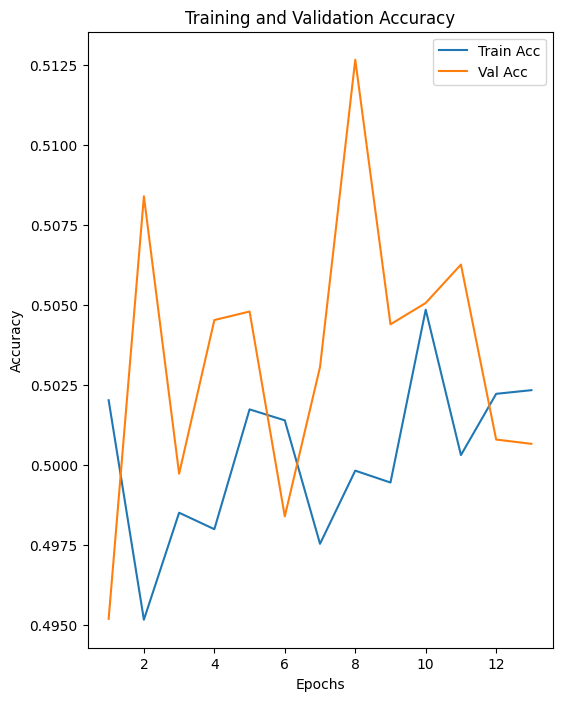

In [ ]:
import matplotlib.pyplot as plt

# Access training history for accuracy values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Access the number of epochs
epochs = range(1, len(train_acc) + 1)

# Create a figure for the plot
plt.figure(figsize=(6, 8))

# Plot the training accuracy over epochs
plt.plot(epochs, train_acc, label='Train Acc')

# Plot the validation accuracy over epochs
plt.plot(epochs, val_acc, label='Val Acc')

# Add a legend to the plot to distinguish the two lines (train and validation accuracy)
plt.legend()

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

# Display the plot
plt.show()


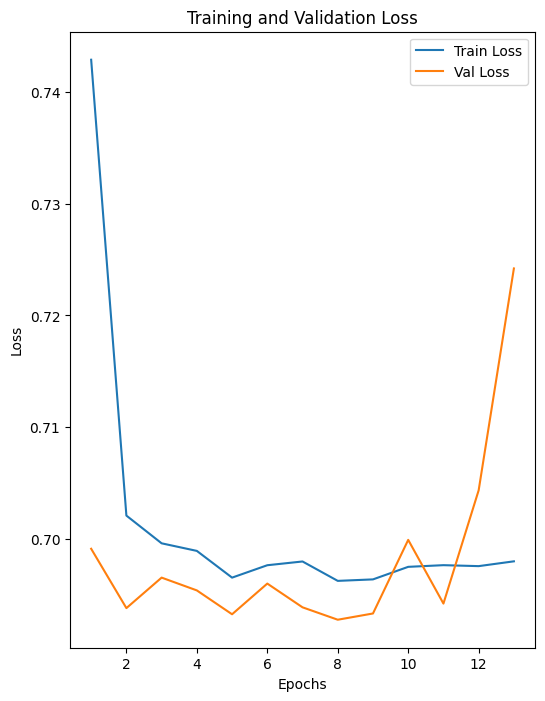

In [ ]:
import matplotlib.pyplot as plt

# Access training history for loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Access the number of epochs
epochs = range(1, len(train_loss) + 1)

# Create a figure for the plot
plt.figure(figsize=(6, 8))

# Plot the training loss over epochs
plt.plot(epochs, train_loss, label='Train Loss')

# Plot the validation loss over epochs
plt.plot(epochs, val_loss, label='Val Loss')

# Add a legend to the plot to distinguish the two lines (train and validation loss)
plt.legend()

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Display the plot
plt.show()


235/235 [==============================] - 18s 75ms/step


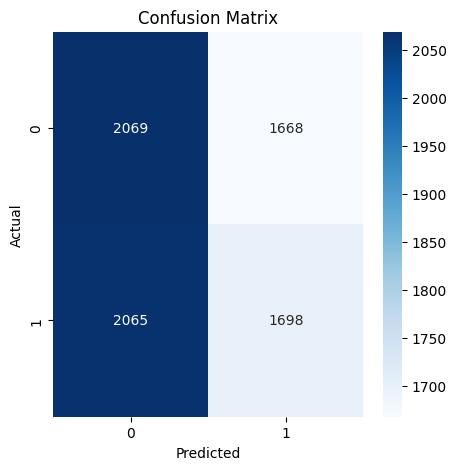

In [ ]:
# Perform inference on the test data to get predicted labels
predicted_labels = model.predict(test_x)
predicted_labels = (predicted_labels > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Calculate the confusion matrix
confusion = confusion_matrix(test_y, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the model in evaluation mode
model.evaluate(test_x, test_y, verbose=0)

# Initialize variables for metrics
test_loss = 0
test_acc = 0

# Lists to store all targets (ground truth) and predicted values
all_target = []
all_predicted = []

# Lists to store the original reviews
original_reviews = []
batch_size = 128
i = 0
# Iterate through the test data
for feature, target in zip(test_x, test_y):
    # Extract the original reviews from the feature tensor (assuming it contains text reviews)
    original_reviews.append(feature)

    # Forward pass through the Keras model
    out = model.predict(np.expand_dims(feature, axis=0))

    # Calculate accuracy
    predicted = 1 if out > 0.5 else 0
    equals = predicted == target
    acc = np.mean(equals.astype(float))
    test_acc += acc

    # Calculate loss
    loss = -(target * np.log(out) + (1 - target) * np.log(1 - out))
    test_loss += loss

    # Append the target (ground truth) and predicted values to the respective lists
    all_target.append(int(target))
    all_predicted.append(predicted)
    i+=1
    if i > batch_size:
      break

# Calculate the average test accuracy and loss
test_acc /= len(test_x)
test_loss /= len(test_x)

# Print the test accuracy and test loss
print('Accuracy:',  test_acc, 'Loss:', test_loss)


# Move the tensors to the CPU (N/A in Keras)

# Create a DataFrame with the results
data = {
    'Original Review': original_reviews,
    'True Label': all_target,
    'Predicted Label': all_predicted
}

df = pd.DataFrame(data)

# Assuming you have a function 'map_review_to_keys' defined for mapping reviews to words
def map_review_to_keys(review, int2word):
    return [int2word[word] for word in review]

# Apply the mapping function to the "Original Review" column
df["Mapped Review"] = df["Original Review"].apply(lambda x: map_review_to_keys(x, int2word))

# Display the DataFrame
df


1/1 [==============================] - 0s 72ms/step
Accuracy: 0.007866666666666666 Loss: [[0.01192467]]


,Original Review,True Label,Predicted Label,Mapped Review
0,"[22, 339, 6, 1, 356, 213, 1795, 34, 1159, 78, ...",1,1,"[really, liked, film, ., feature, John, Wayne,..."
1,"[14, 6, 2, 332, 867, 26290, 2, 538, 544, 2, 49...",1,1,"[This, film, ,, early, William, Wellman, ,, im..."
2,"[3469, 3454, 14803, 83, 12, 12607, 29, 31, 345...",0,1,"[Remember, Rick, Mercer, funny, ?, Minutes, gr..."
3,"[7, 60, 30, 1556, 10562, 2, 237, 878, 1409, 6,...",1,0,"[The, best, way, describe, Europa, ,, high, li..."
4,"[2389, 1414, 2, 3, 167, 6, 1321, 2, 23, 1480, ...",1,0,"[Unlike, commentary, ,, I, found, film, fascin..."
...,...,...,...,...
124,"[2578, 2578, 14, 5, 9886, 1, 457, 211, 48, 3, ...",0,1,"[SPOILER, SPOILER, This, movie, stunk, ., Just..."
125,"[549, 2, 3, 48, 3, 1261, 139, 120, 2503, 5, 81...",0,0,"[First, ,, I, say, I, generally, big, fan, wer..."
126,"[359, 4, 280, 5, 2, 54, 723, 354, 1, 1, 1, 785...",0,1,"[comment, -, stupid, movie, ,, acting, average..."
127,"[3, 22, 1807, 21, 687, 19760, 512, 5, 1, 11, 2...",0,0,"[I, really, fail, see, actual, surplus, value,..."


#LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout, Dense

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=embedding_size))
model.add(LSTM(hidden_size, return_sequences=True))
model.add(Dropout(dropout))
model.add(LSTM(hidden_size))
model.add(Dense(output_size, activation='sigmoid'))

In [ ]:
from keras.optimizers import Adam
lr = 0.001
model.compile(optimizer=Adam(lr=lr), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Early Stopping Limit (es_limit)
es_limit = 5  # Early stopping is applied if validation performance doesn't improve for 5 consecutive epochs.

# Number of Training Epochs (epochs)
epochs = 25
batch_size = 128

# Define Keras callbacks for model checkpoint and early stopping
checkpoint = ModelCheckpoint('sentiment_lstm_keras.h5', monitor='val_loss', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=es_limit, verbose=1)

# Initialize training history for storing metrics
history = model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs,
                    validation_data=(val_x, val_y), callbacks=[checkpoint, early_stopping])

Epoch 1/25
274/274 [==============================] - ETA: 0s - loss: 0.6958 - accuracy: 0.5028
Epoch 1: val_loss improved from inf to 0.69287, saving model to sentiment_lstm_keras.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


274/274 [==============================] - 95s 334ms/step - loss: 0.6958 - accuracy: 0.5028 - val_loss: 0.6929 - val_accuracy: 0.5085
Epoch 2/25
274/274 [==============================] - ETA: 0s - loss: 0.6939 - accuracy: 0.5062
Epoch 2: val_loss did not improve from 0.69287
274/274 [==============================] - 79s 287ms/step - loss: 0.6939 - accuracy: 0.5062 - val_loss: 0.6934 - val_accuracy: 0.5004
Epoch 3/25
274/274 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5017
Epoch 3: val_loss did not improve from 0.69287
274/274 [==============================] - 78s 286ms/step - loss: 0.6933 - accuracy: 0.5017 - val_loss: 0.6933 - val_accuracy: 0.5025
Epoch 4/25
274/274 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.5123
Epoch 4: val_loss did not improve from 0.69287
274/274 [==============================] - 77s 282ms/step - loss: 0.6937 - accuracy: 0.5123 - val_loss: 0.6954 - val_accuracy: 0.4996
Epoch 5/25
274/274 [===============

In [ ]:
# Optionally, load the best model checkpoint
model.load_weights('sentiment_lstm_keras.h5')

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_x, test_y)
print(f'Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}')

235/235 [==============================] - 8s 34ms/step - loss: 0.3471 - accuracy: 0.8731
Test Accuracy: 0.8731, Test Loss: 0.3471


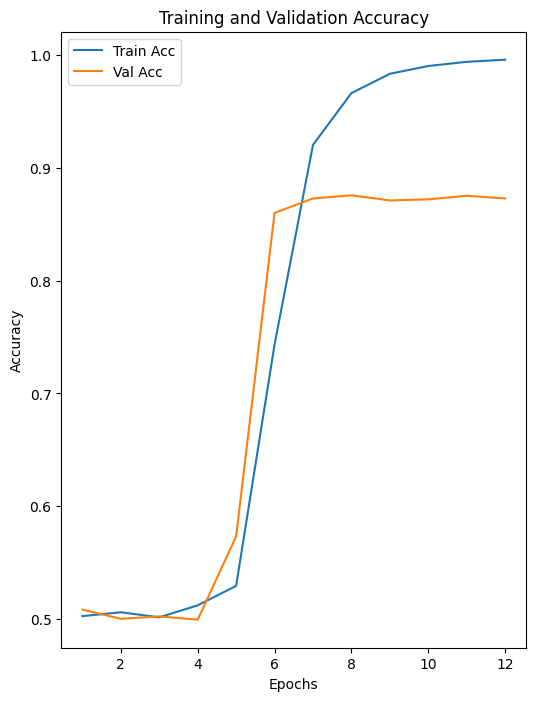

In [ ]:
import matplotlib.pyplot as plt

# Access training history for accuracy values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Access the number of epochs
epochs = range(1, len(train_acc) + 1)

# Create a figure for the plot
plt.figure(figsize=(6, 8))

# Plot the training accuracy over epochs
plt.plot(epochs, train_acc, label='Train Acc')

# Plot the validation accuracy over epochs
plt.plot(epochs, val_acc, label='Val Acc')

# Add a legend to the plot to distinguish the two lines (train and validation accuracy)
plt.legend()

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

# Display the plot
plt.show()


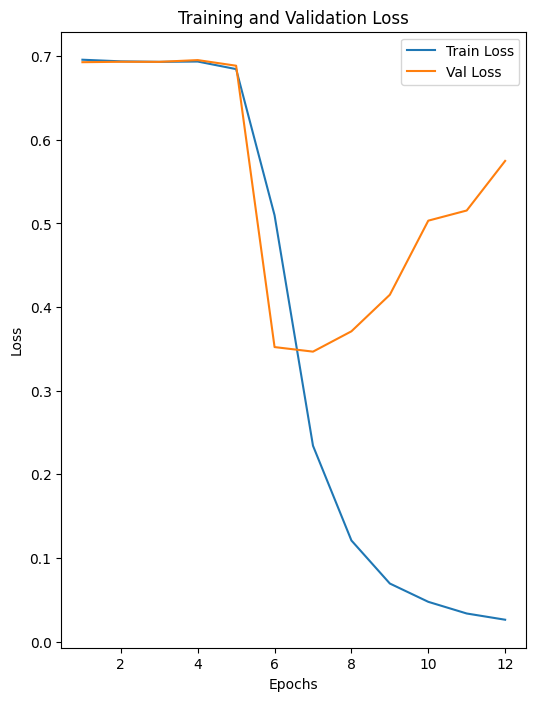

In [ ]:
import matplotlib.pyplot as plt

# Access training history for loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Access the number of epochs
epochs = range(1, len(train_loss) + 1)

# Create a figure for the plot
plt.figure(figsize=(6, 8))

# Plot the training loss over epochs
plt.plot(epochs, train_loss, label='Train Loss')

# Plot the validation loss over epochs
plt.plot(epochs, val_loss, label='Val Loss')

# Add a legend to the plot to distinguish the two lines (train and validation loss)
plt.legend()

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Display the plot
plt.show()


235/235 [==============================] - 9s 32ms/step


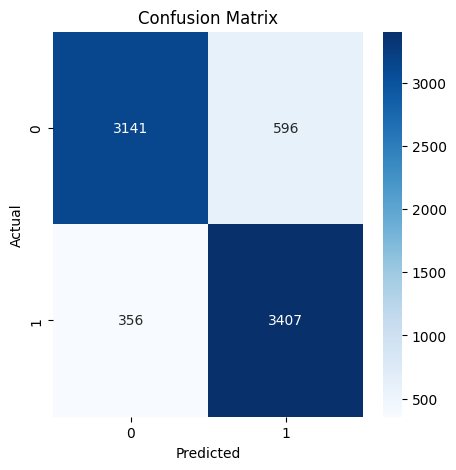

In [ ]:
# Perform inference on the test data to get predicted labels
predicted_labels = model.predict(test_x)
predicted_labels = (predicted_labels > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Calculate the confusion matrix
confusion = confusion_matrix(test_y, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the model in evaluation mode
model.evaluate(test_x, test_y, verbose=0)

# Initialize variables for metrics
test_loss = 0
test_acc = 0

# Lists to store all targets (ground truth) and predicted values
all_target = []
all_predicted = []

# Lists to store the original reviews
original_reviews = []
batch_size = 128
i = 0
# Iterate through the test data
for feature, target in zip(test_x, test_y):
    # Extract the original reviews from the feature tensor (assuming it contains text reviews)
    original_reviews.append(feature)

    # Forward pass through the Keras model
    out = model.predict(np.expand_dims(feature, axis=0))

    # Calculate accuracy
    predicted = 1 if out > 0.5 else 0
    equals = predicted == target
    acc = np.mean(equals.astype(float))
    test_acc += acc

    # Calculate loss
    loss = -(target * np.log(out) + (1 - target) * np.log(1 - out))
    test_loss += loss

    # Append the target (ground truth) and predicted values to the respective lists
    all_target.append(int(target))
    all_predicted.append(predicted)
    i+=1
    if i > batch_size:
      break

# Calculate the average test accuracy and loss
test_acc /= len(test_x)
test_loss /= len(test_x)

# Print the test accuracy and test loss
print('Accuracy:',  test_acc, 'Loss:', test_loss)


# Move the tensors to the CPU (N/A in Keras)

# Create a DataFrame with the results
data = {
    'Original Review': original_reviews,
    'True Label': all_target,
    'Predicted Label': all_predicted
}

df = pd.DataFrame(data)

# Assuming you have a function 'map_review_to_keys' defined for mapping reviews to words
def map_review_to_keys(review, int2word):
    return [int2word[word] for word in review]

# Apply the mapping function to the "Original Review" column
df["Mapped Review"] = df["Original Review"].apply(lambda x: map_review_to_keys(x, int2word))

# Display the DataFrame
df


1/1 [==============================] - 0s 29ms/step
Accuracy: 0.0148 Loss: [[0.00758783]]


,Original Review,True Label,Predicted Label,Mapped Review
0,"[22, 339, 6, 1, 356, 213, 1795, 34, 1159, 78, ...",1,1,"[really, liked, film, ., feature, John, Wayne,..."
1,"[14, 6, 2, 332, 867, 26290, 2, 538, 544, 2, 49...",1,1,"[This, film, ,, early, William, Wellman, ,, im..."
2,"[3469, 3454, 14803, 83, 12, 12607, 29, 31, 345...",0,0,"[Remember, Rick, Mercer, funny, ?, Minutes, gr..."
3,"[7, 60, 30, 1556, 10562, 2, 237, 878, 1409, 6,...",1,1,"[The, best, way, describe, Europa, ,, high, li..."
4,"[2389, 1414, 2, 3, 167, 6, 1321, 2, 23, 1480, ...",1,1,"[Unlike, commentary, ,, I, found, film, fascin..."
...,...,...,...,...
124,"[2578, 2578, 14, 5, 9886, 1, 457, 211, 48, 3, ...",0,1,"[SPOILER, SPOILER, This, movie, stunk, ., Just..."
125,"[549, 2, 3, 48, 3, 1261, 139, 120, 2503, 5, 81...",0,0,"[First, ,, I, say, I, generally, big, fan, wer..."
126,"[359, 4, 280, 5, 2, 54, 723, 354, 1, 1, 1, 785...",0,0,"[comment, -, stupid, movie, ,, acting, average..."
127,"[3, 22, 1807, 21, 687, 19760, 512, 5, 1, 11, 2...",0,0,"[I, really, fail, see, actual, surplus, value,..."


#GRU Model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dropout, Dense

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=embedding_size))
model.add(GRU(hidden_size, return_sequences=True))
model.add(Dropout(dropout))
model.add(GRU(hidden_size))
model.add(Dense(output_size, activation='sigmoid'))

In [ ]:
from keras.optimizers import Adam
lr = 0.001
model.compile(optimizer=Adam(lr=lr), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Early Stopping Limit (es_limit)
es_limit = 5  # Early stopping is applied if validation performance doesn't improve for 5 consecutive epochs.

# Number of Training Epochs (epochs)
epochs = 25
batch_size = 128

# Define Keras callbacks for model checkpoint and early stopping
checkpoint = ModelCheckpoint('sentiment_gru_keras.h5', monitor='val_loss', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=es_limit, verbose=1)

# Initialize training history for storing metrics
history = model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs,
                    validation_data=(val_x, val_y), callbacks=[checkpoint, early_stopping])

Epoch 1/25
274/274 [==============================] - ETA: 0s - loss: 0.6939 - accuracy: 0.4991
Epoch 1: val_loss improved from inf to 0.69330, saving model to sentiment_gru_keras.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


274/274 [==============================] - 74s 255ms/step - loss: 0.6939 - accuracy: 0.4991 - val_loss: 0.6933 - val_accuracy: 0.4991
Epoch 2/25
274/274 [==============================] - ETA: 0s - loss: 0.6800 - accuracy: 0.5289
Epoch 2: val_loss did not improve from 0.69330
274/274 [==============================] - 65s 235ms/step - loss: 0.6800 - accuracy: 0.5289 - val_loss: 0.6976 - val_accuracy: 0.5084
Epoch 3/25
274/274 [==============================] - ETA: 0s - loss: 0.6223 - accuracy: 0.5684
Epoch 3: val_loss improved from 0.69330 to 0.63508, saving model to sentiment_gru_keras.h5
274/274 [==============================] - 74s 272ms/step - loss: 0.6223 - accuracy: 0.5684 - val_loss: 0.6351 - val_accuracy: 0.6841
Epoch 4/25
274/274 [==============================] - ETA: 0s - loss: 0.3463 - accuracy: 0.8492
Epoch 4: val_loss improved from 0.63508 to 0.37707, saving model to sentiment_gru_keras.h5
274/274 [==============================] - 70s 256ms/step - loss: 0.3463 - accura

In [ ]:
# Optionally, load the best model checkpoint
model.load_weights('sentiment_gru_keras.h5')

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_x, test_y)
print(f'Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}')

235/235 [==============================] - 7s 28ms/step - loss: 0.3636 - accuracy: 0.8588
Test Accuracy: 0.8588, Test Loss: 0.3636


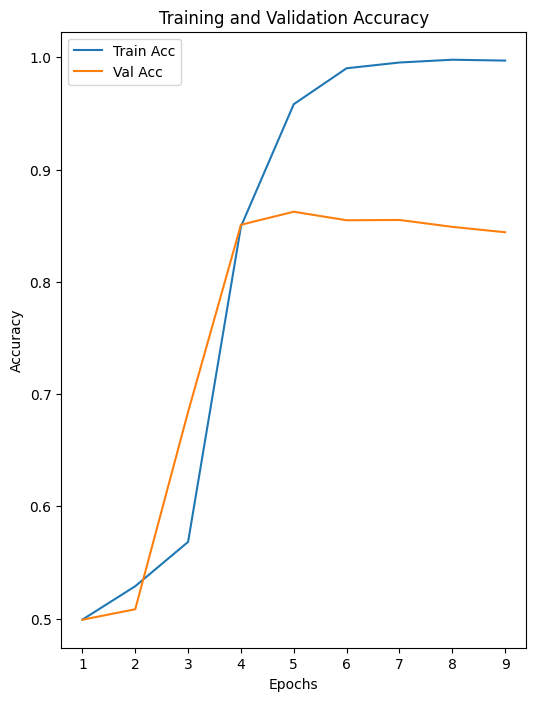

In [ ]:
import matplotlib.pyplot as plt

# Access training history for accuracy values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Access the number of epochs
epochs = range(1, len(train_acc) + 1)

# Create a figure for the plot
plt.figure(figsize=(6, 8))

# Plot the training accuracy over epochs
plt.plot(epochs, train_acc, label='Train Acc')

# Plot the validation accuracy over epochs
plt.plot(epochs, val_acc, label='Val Acc')

# Add a legend to the plot to distinguish the two lines (train and validation accuracy)
plt.legend()

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

# Display the plot
plt.show()


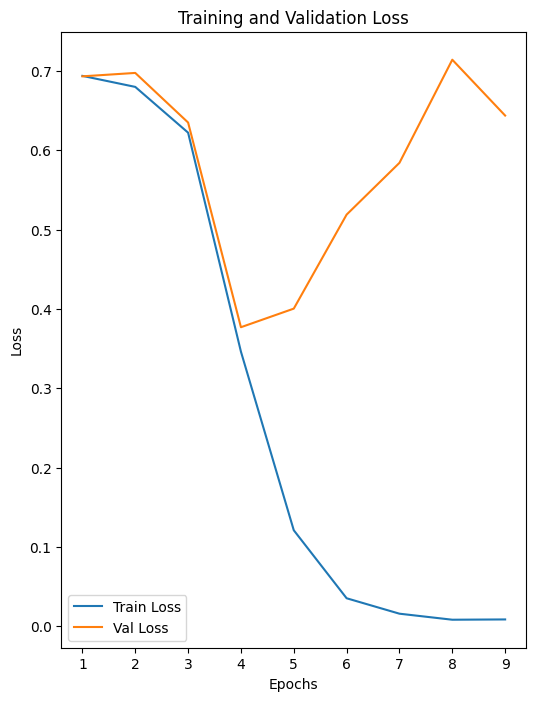

In [ ]:
import matplotlib.pyplot as plt

# Access training history for loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Access the number of epochs
epochs = range(1, len(train_loss) + 1)

# Create a figure for the plot
plt.figure(figsize=(6, 8))

# Plot the training loss over epochs
plt.plot(epochs, train_loss, label='Train Loss')

# Plot the validation loss over epochs
plt.plot(epochs, val_loss, label='Val Loss')

# Add a legend to the plot to distinguish the two lines (train and validation loss)
plt.legend()

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Display the plot
plt.show()


235/235 [==============================] - 7s 26ms/step


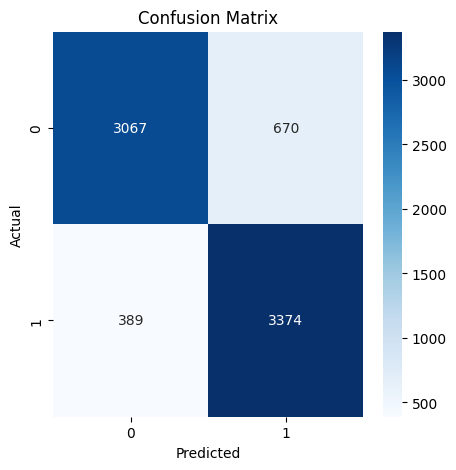

In [ ]:
# Perform inference on the test data to get predicted labels
predicted_labels = model.predict(test_x)
predicted_labels = (predicted_labels > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Calculate the confusion matrix
confusion = confusion_matrix(test_y, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the model in evaluation mode
model.evaluate(test_x, test_y, verbose=0)

# Initialize variables for metrics
test_loss = 0
test_acc = 0

# Lists to store all targets (ground truth) and predicted values
all_target = []
all_predicted = []

# Lists to store the original reviews
original_reviews = []
batch_size = 128
i = 0
# Iterate through the test data
for feature, target in zip(test_x, test_y):
    # Extract the original reviews from the feature tensor (assuming it contains text reviews)
    original_reviews.append(feature)

    # Forward pass through the Keras model
    out = model.predict(np.expand_dims(feature, axis=0))

    # Calculate accuracy
    predicted = 1 if out > 0.5 else 0
    equals = predicted == target
    acc = np.mean(equals.astype(float))
    test_acc += acc

    # Calculate loss
    loss = -(target * np.log(out) + (1 - target) * np.log(1 - out))
    test_loss += loss

    # Append the target (ground truth) and predicted values to the respective lists
    all_target.append(int(target))
    all_predicted.append(predicted)
    i+=1
    if i > batch_size:
      break

# Calculate the average test accuracy and loss
test_acc /= len(test_x)
test_loss /= len(test_x)

# Print the test accuracy and test loss
print('Accuracy:',  test_acc, 'Loss:', test_loss)


# Move the tensors to the CPU (N/A in Keras)

# Create a DataFrame with the results
data = {
    'Original Review': original_reviews,
    'True Label': all_target,
    'Predicted Label': all_predicted
}

df = pd.DataFrame(data)

# Assuming you have a function 'map_review_to_keys' defined for mapping reviews to words
def map_review_to_keys(review, int2word):
    return [int2word[word] for word in review]

# Apply the mapping function to the "Original Review" column
df["Mapped Review"] = df["Original Review"].apply(lambda x: map_review_to_keys(x, int2word))

# Display the DataFrame
df


1/1 [==============================] - 0s 41ms/step
Accuracy: 0.013733333333333334 Loss: [[0.00933979]]


,Original Review,True Label,Predicted Label,Mapped Review
0,"[22, 339, 6, 1, 356, 213, 1795, 34, 1159, 78, ...",1,1,"[really, liked, film, ., feature, John, Wayne,..."
1,"[14, 6, 2, 332, 867, 26290, 2, 538, 544, 2, 49...",1,1,"[This, film, ,, early, William, Wellman, ,, im..."
2,"[3469, 3454, 14803, 83, 12, 12607, 29, 31, 345...",0,0,"[Remember, Rick, Mercer, funny, ?, Minutes, gr..."
3,"[7, 60, 30, 1556, 10562, 2, 237, 878, 1409, 6,...",1,1,"[The, best, way, describe, Europa, ,, high, li..."
4,"[2389, 1414, 2, 3, 167, 6, 1321, 2, 23, 1480, ...",1,0,"[Unlike, commentary, ,, I, found, film, fascin..."
...,...,...,...,...
124,"[2578, 2578, 14, 5, 9886, 1, 457, 211, 48, 3, ...",0,1,"[SPOILER, SPOILER, This, movie, stunk, ., Just..."
125,"[549, 2, 3, 48, 3, 1261, 139, 120, 2503, 5, 81...",0,1,"[First, ,, I, say, I, generally, big, fan, wer..."
126,"[359, 4, 280, 5, 2, 54, 723, 354, 1, 1, 1, 785...",0,0,"[comment, -, stupid, movie, ,, acting, average..."
127,"[3, 22, 1807, 21, 687, 19760, 512, 5, 1, 11, 2...",0,0,"[I, really, fail, see, actual, surplus, value,..."
